In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
#from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import style # for styling
style.use('ggplot')
from textblob import TextBlob #to process the data
from nltk.tokenize import word_tokenize #for tokenization
from nltk.stem import PorterStemmer #for stemming
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('tweets.csv')

In [3]:
df.head(10)

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified
0,7549,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1.563160e+18,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,3/15/2011,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
1,6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1.563160e+18,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,8/21/2012,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
2,6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1.563160e+18,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,1/1/2021,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
3,6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1.563160e+18,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,10/2/2020,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
4,6330,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1.563160e+18,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,1/1/2021,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
5,6331,2022-08-26 13:54:52.737801+00,CBI Unfold D Truth InSSRCase,1.563160e+18,2022-08-26 13:54:47+00,tanvitare,Tanvi Tare 🇮🇳,Invincible Warrior,393,RT @carmiemonsang21: @AshutoshSureka @AlkeshAm...,NaN,en,6,12/22/2013,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
6,6332,2022-08-26 13:54:52.796806+00,CBI Unfold D Truth InSSRCase,1.563160e+18,2022-08-26 13:54:46+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,Canada,en,3,1/1/2021,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
7,6333,2022-08-26 13:54:52.837799+00,CBI Unfold D Truth InSSRCase,1.563160e+18,2022-08-26 13:54:46+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @SSRkaFan: Sushant family and fans are wait...,Australia,en,38,8/21/2012,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
8,6345,2022-08-26 13:54:54.345522+00,CBI Unfold D Truth InSSRCase,1.563160e+18,2022-08-26 13:54:29+00,Satya91539128,Satya🇮🇳,NaN,2853,RT @dharmap63088253: CBI Unfold D Truth InSSRCase,NaN,en,4,12/12/2020,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
9,6334,2022-08-26 13:54:52.881808+00,CBI Unfold D Truth InSSRCase,1.563160e+18,2022-08-26 13:54:45+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @Its_GautamRinee: @SatyaSSRian1 @PMOIndia @...,Canada,en,7,1/1/2021,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5232 non-null   int64  
 1   hashtag_generation_time  5232 non-null   object 
 2   searched_hashtag         5232 non-null   object 
 3   tweet_id                 5232 non-null   float64
 4   tweet_created_at         5232 non-null   object 
 5   screen_name              5232 non-null   object 
 6   name                     5232 non-null   object 
 7   user_description         4274 non-null   object 
 8   followers_count          5232 non-null   int64  
 9   tweet                    5232 non-null   object 
 10  location                 2587 non-null   object 
 11  iso_language_code        5232 non-null   object 
 12  retweet_count            5232 non-null   int64  
 13  user_created_at          5232 non-null   object 
 14  favorite_count          

In [5]:
df.columns

Index(['id', 'hashtag_generation_time', 'searched_hashtag', 'tweet_id',
       'tweet_created_at', 'screen_name', 'name', 'user_description',
       'followers_count', 'tweet', 'location', 'iso_language_code',
       'retweet_count', 'user_created_at', 'favorite_count', 'entities',
       'tweet_source', 'verified'],
      dtype='object')

In [6]:
text_df = df.drop(['id', 'hashtag_generation_time', 'searched_hashtag', 'tweet_id',
       'tweet_created_at', 'screen_name', 'name', 'user_description',
       'followers_count', 'location', 'iso_language_code',
       'retweet_count', 'user_created_at', 'favorite_count', 'entities',
       'tweet_source', 'verified'], axis=1)
text_df.head()

,tweet
0,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...
1,RT @keesain99: CBI Unfold D Truth InSSRCase \n...
2,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...
3,RT @sushfanseg: Why Rhea Chakraborty's custodi...
4,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...


In [7]:
print(text_df['tweet'].iloc[0],'\n')
print(text_df['tweet'].iloc[1],'\n')
print(text_df['tweet'].iloc[2],'\n')
print(text_df['tweet'].iloc[3],'\n')
print(text_df['tweet'].iloc[4],'\n')

RT @privin07: @divine__ssr @ATUL7735 Thanks a lot Diyu for such lovely words 💗🥰

We all are amazing and Sushi is proud of us all🙌

CBI Unfo… 

RT @keesain99: CBI Unfold D Truth InSSRCase 

Truth and justice are above and beyond everything for the greatness of nations depends on the… 

RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoPTGoI CBI Unfold D Truth InSSRCase🔥 

RT @sushfanseg: Why Rhea Chakraborty's custodial interrogation is not done by CBI??

@IPS_Association @PMOIndia 
CBI Unfold D Truth InSSRCa… 

RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoPTGoI CBI Unfold D Truth InSSRCase🔥🔥 



In [8]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   5232 non-null   object
dtypes: object(1)
memory usage: 41.0+ KB


In [9]:
def data_processing(text):
    text=text.lower()
    text=re.sub(r"https\S+|www\S+https\S+",'',text,flags=re.MULTILINE)
    text=re.sub(r'\@w+|\#','',text)
    text=re.sub(r'[^\w\s]','',text)
    text=re.sub(r'^[RT]+','',text)
    text_tokens=word_tokenize(text)
    filtered_text=[w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [10]:
text_df.tweet = text_df['tweet'].apply(data_processing)

In [11]:
text_df=text_df.drop_duplicates('tweet')

In [12]:
text_df.head()

,tweet
0,rt privin07 divine__ssr atul7735 thanks lot di...
1,rt keesain99 cbi unfold truth inssrcase truth ...
2,rt chintujainhs satyassrian1 pmoindia doptgoi ...
3,rt sushfanseg rhea chakrabortys custodial inte...
4,rt manisha_1604 satyassrian1 pmoindia doptgoi ...


In [13]:
stemmer=PorterStemmer()
def stemming(data):
    text=[stemmer.stem(word) for word in data]
    return data

In [14]:
text_df['tweet']=text_df['tweet'].apply(lambda x:stemming(x))

In [15]:
text_df.head()

,tweet
0,rt privin07 divine__ssr atul7735 thanks lot di...
1,rt keesain99 cbi unfold truth inssrcase truth ...
2,rt chintujainhs satyassrian1 pmoindia doptgoi ...
3,rt sushfanseg rhea chakrabortys custodial inte...
4,rt manisha_1604 satyassrian1 pmoindia doptgoi ...


In [16]:
print(text_df['tweet'].iloc[0],'\n')
print(text_df['tweet'].iloc[1],'\n')
print(text_df['tweet'].iloc[2],'\n')
print(text_df['tweet'].iloc[3],'\n')
print(text_df['tweet'].iloc[4],'\n')

rt privin07 divine__ssr atul7735 thanks lot diyu lovely words amazing sushi proud us cbi unfo 

rt keesain99 cbi unfold truth inssrcase truth justice beyond everything greatness nations depends 

rt chintujainhs satyassrian1 pmoindia doptgoi cbi unfold truth inssrcase 

rt sushfanseg rhea chakrabortys custodial interrogation done cbi ips_association pmoindia cbi unfold truth inssrca 

rt manisha_1604 satyassrian1 pmoindia doptgoi cbi unfold truth inssrcase 



In [17]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2225 entries, 0 to 5224
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   2225 non-null   object
dtypes: object(1)
memory usage: 34.8+ KB


In [18]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [19]:
text_df['polarity']=text_df['tweet'].apply(polarity)

In [20]:
text_df.head()

,tweet,polarity
0,rt privin07 divine__ssr atul7735 thanks lot di...,0.525
1,rt keesain99 cbi unfold truth inssrcase truth ...,0.000
2,rt chintujainhs satyassrian1 pmoindia doptgoi ...,0.000
3,rt sushfanseg rhea chakrabortys custodial inte...,0.000
4,rt manisha_1604 satyassrian1 pmoindia doptgoi ...,0.000


In [21]:
#adding sentiment col to the dataframe

In [22]:
def sentiment(label):
    if label<0:
        return "Negative"
    elif label==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [23]:
text_df['sentiment']=text_df['polarity'].apply(sentiment)

In [24]:
text_df.head()

,tweet,polarity,sentiment
0,rt privin07 divine__ssr atul7735 thanks lot di...,0.525,Positive
1,rt keesain99 cbi unfold truth inssrcase truth ...,0.000,Neutral
2,rt chintujainhs satyassrian1 pmoindia doptgoi ...,0.000,Neutral
3,rt sushfanseg rhea chakrabortys custodial inte...,0.000,Neutral
4,rt manisha_1604 satyassrian1 pmoindia doptgoi ...,0.000,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

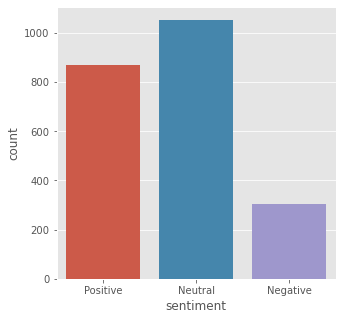

In [25]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x='sentiment',data=text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

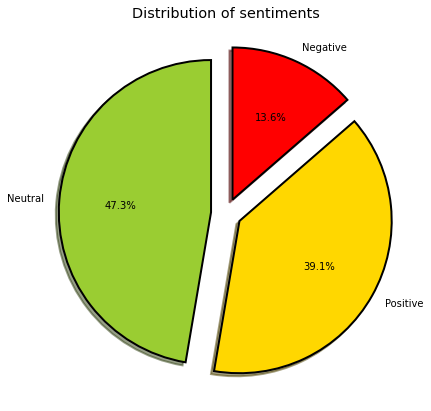

In [26]:
fig=plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={'linewidth':2,'edgecolor':"black"}
tags=text_df['sentiment'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%', shadow=True, colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title("Distribution of sentiments")

In [27]:
pos_tweets=text_df[text_df.sentiment=='Positive']
pos_tweets=pos_tweets.sort_values(['polarity'],ascending=False)
pos_tweets.head()

,tweet,polarity,sentiment
914,rt dolly18879655 one best way achieve justice ...,1.0,Positive
224,rt rd54799715 sheetaly superb cbi unfold truth...,1.0,Positive
3141,rt satya91539128 sandeep said best friend ssr ...,1.0,Positive
1249,rt nyay4ssr atul7735 privin07 congratulations ...,1.0,Positive
1256,rt divine__ssr atul7735 privin07 superb pri di...,0.9,Positive


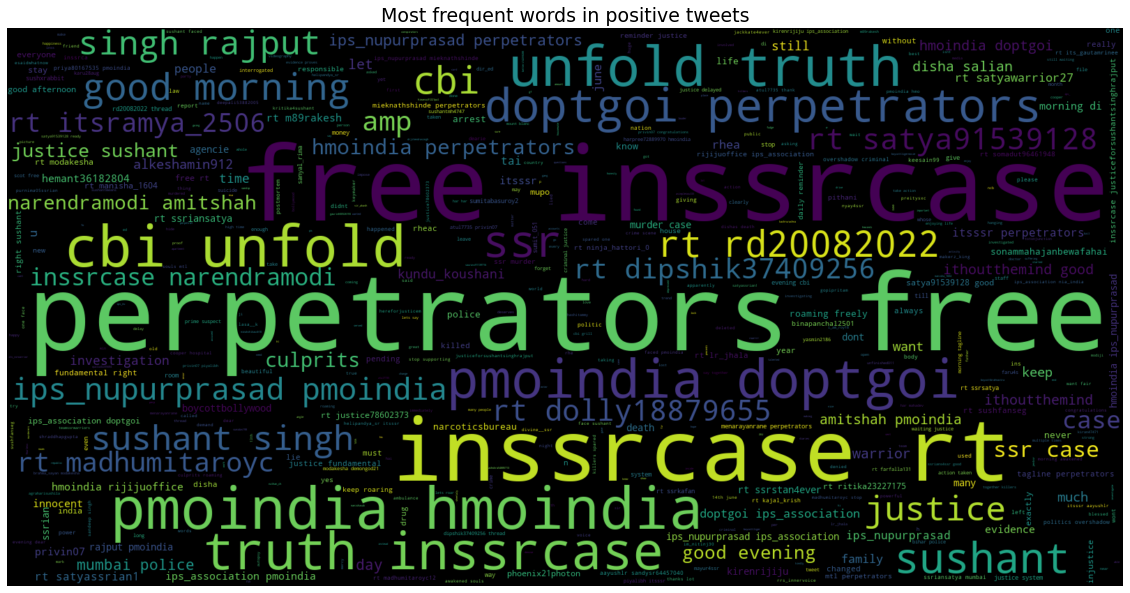

In [28]:
text = ' '.join([word for word in pos_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width = 1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [29]:
neg_tweets=text_df[text_df.sentiment=='Negative']
neg_tweets=neg_tweets.sort_values(['polarity'],ascending=False)
neg_tweets.head()

,tweet,polarity,sentiment
3194,mumbai police handover house back owner allowe...,-0.012500,Negative
2769,rt ssriansatya mumbai police handover house ba...,-0.012500,Negative
818,rt dolly18879655 peace absence war presence ju...,-0.012500,Negative
3833,rt im_nitinj30 ips_nupurprasad pmoindia entire...,-0.016667,Negative
3231,rt imdeb_s cbi quiet since long obviously rais...,-0.016667,Negative


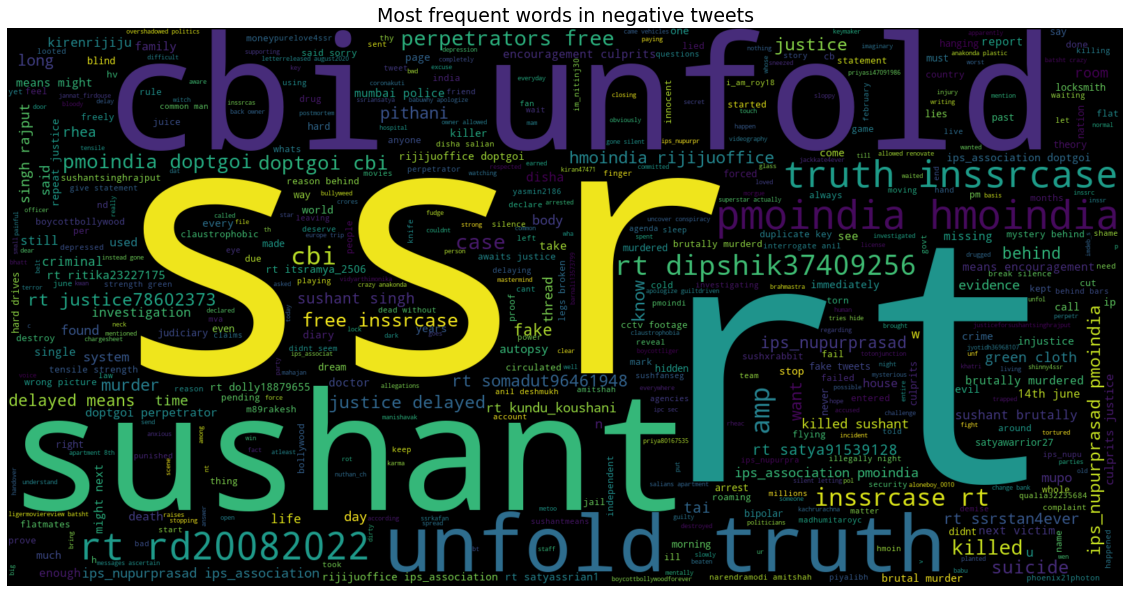

In [30]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width = 1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [31]:
neutral_tweets=text_df[text_df.sentiment=='Neutral']
neutral_tweets=neutral_tweets.sort_values(['polarity'],ascending=False)
neutral_tweets.head()

,tweet,polarity,sentiment
1,rt keesain99 cbi unfold truth inssrcase truth ...,0.0,Neutral
2109,kajal_krish pmoindia hmoindia kirenrijiju ips_...,0.0,Neutral
2148,rt forsushantsr please cbi unfold truth inssrcase,0.0,Neutral
2151,rt satyassrian1 lets say together im truth mat...,0.0,Neutral
2177,rt m89rakesh cbi unfold truth inssrcase yasmin...,0.0,Neutral


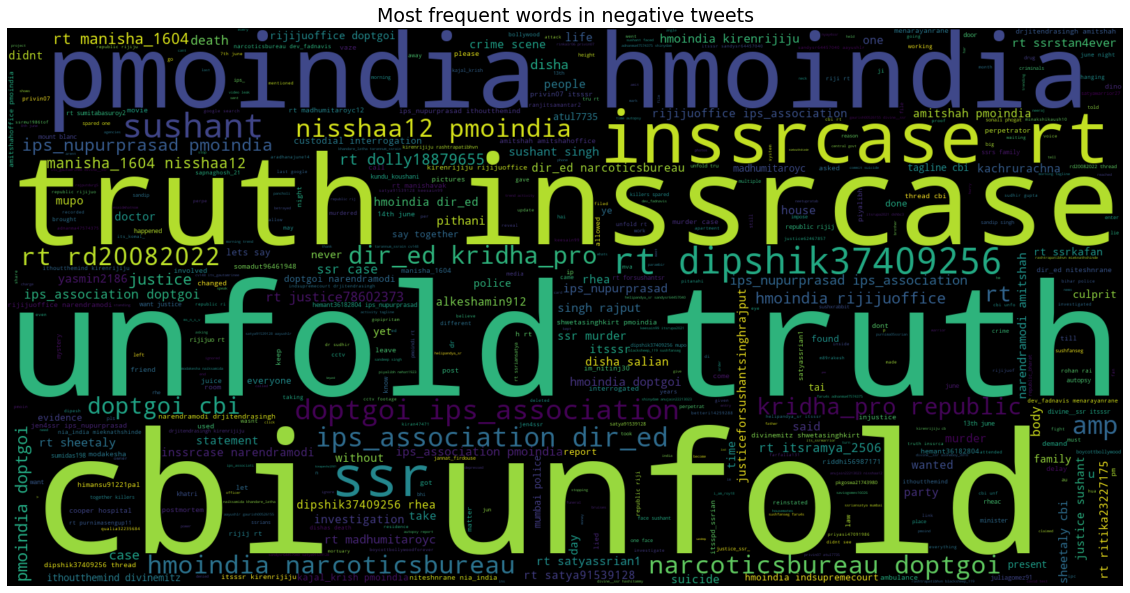

In [32]:
text = ' '.join([word for word in neutral_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width = 1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [33]:
text_df.sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [34]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['tweet'])

In [35]:
feature_names = vect.get_feature_names()
print("Number of features : {}\n".format(len(feature_names)))
print("First 20 features :\n {}".format(feature_names[:20]))

Number of features : 15979

First 20 features :
 ['0305', '0305 sushantmh4747', '0405', '0405 sushantmh4747', '05', '05 positive', '0505', '0505 sushantmh4747', '10', '10 rs', '10 sushant', '10 two', '10 witness', '10 years', '100', '100 calls', '100 cbi', '100 leaving', '100 perpetrators', '100 suicide']


In [36]:
#Model Building

In [37]:
X=text_df['tweet']

In [38]:
y=text_df['sentiment']

In [39]:
X=vect.transform(X)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
print("Size of x_train: ", x_train.shape)
print("Size of x_test: ", x_test.shape)
print("Size of y_train: ", y_train.shape)
print("Size of y_test: ", y_test.shape)

Size of x_train:  (1780, 15979)
Size of x_test:  (445, 15979)
Size of y_train:  (1780,)
Size of y_test:  (445,)


In [42]:
model = LogisticRegression()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
model_acc = accuracy_score(model_pred,y_test)
print("Test Accuracy : {:.2f}%".format(model_acc*100))

Test Accuracy : 81.12%


In [43]:
print(confusion_matrix(y_test,model_pred))
print("\n")
print(classification_report(y_test,model_pred))

[[ 30  31   9]
 [  1 196   5]
 [  3  35 135]]


              precision    recall  f1-score   support

    Negative       0.88      0.43      0.58        70
     Neutral       0.75      0.97      0.84       202
    Positive       0.91      0.78      0.84       173

    accuracy                           0.81       445
   macro avg       0.85      0.73      0.75       445
weighted avg       0.83      0.81      0.80       445



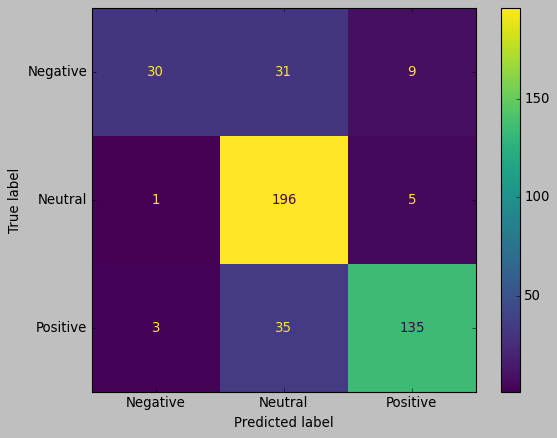

In [44]:
style.use('classic')
cm = confusion_matrix(y_test,model_pred,labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
param_grid = {'C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [48]:
print("Best parameters: ", grid.best_params_)

Best parameters:  {'C': 10}


In [49]:
y_pred = grid.predict(x_test)

In [50]:
model_acc = accuracy_score(y_pred,y_test)
print("Test_accuracy : {:.2f}%".format(model_acc*100)) 

Test_accuracy : 81.57%


In [51]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[ 33  28   9]
 [  1 194   7]
 [  4  33 136]]


              precision    recall  f1-score   support

    Negative       0.87      0.47      0.61        70
     Neutral       0.76      0.96      0.85       202
    Positive       0.89      0.79      0.84       173

    accuracy                           0.82       445
   macro avg       0.84      0.74      0.77       445
weighted avg       0.83      0.82      0.81       445



In [52]:
#running on Support vector machine

In [53]:
from sklearn.svm import SVC
svcmodel = SVC()
svcmodel.fit(x_train,y_train)

SVC()

In [54]:
svc_pred = svcmodel.predict(x_test)

In [55]:
svc_acc = accuracy_score(svc_pred,y_test)
print("Test accuracy : {:.2f}%".format(svc_acc*100))

Test accuracy : 75.51%


In [56]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[ 10  56   4]
 [  0 201   1]
 [  0  48 125]]


              precision    recall  f1-score   support

    Negative       1.00      0.14      0.25        70
     Neutral       0.66      1.00      0.79       202
    Positive       0.96      0.72      0.83       173

    accuracy                           0.76       445
   macro avg       0.87      0.62      0.62       445
weighted avg       0.83      0.76      0.72       445



In [57]:
#Hyperparameter tuning for the SVM model


In [58]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel':['linear','poly','rbf','sigmoid'],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid=GridSearchCV(svcmodel,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [59]:
print("Best parameters: ", grid.best_params_)

Best parameters:  {'C': 10}


In [60]:
y_pred = grid.predict(x_test)

In [61]:
model_acc=accuracy_score(y_pred,y_test)

In [62]:
print("Accuracy score : {:.2f}%".format(model_acc*100))

Accuracy score : 78.20%


In [63]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[ 22  42   6]
 [  0 199   3]
 [  2  44 127]]


              precision    recall  f1-score   support

    Negative       0.92      0.31      0.47        70
     Neutral       0.70      0.99      0.82       202
    Positive       0.93      0.73      0.82       173

    accuracy                           0.78       445
   macro avg       0.85      0.68      0.70       445
weighted avg       0.82      0.78      0.76       445

